Nummerical Itegration - Exercise 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

In [9]:
true = norm.cdf(5, 3, 2) - norm.cdf(0, 3, 2)
true

0.7745375447996848

In [10]:
def norm_distr(x, u, sd):
    return (1/(np.sqrt(2*np.pi)*sd))*np.exp(-0.5*((x-u)/sd)**2)

In [19]:
def trap_apr(a_b, N):
    h = np.abs(a_b[0]-a_b[1])/N
    midpoints = np.zeros(N-1)
    for i in range(1,N):
        fx = norm_distr((a_b[0] + i * h), 3, 2)
        midpoints[i-1] = fx
    return h*(sum([norm_distr(a_b[0], 3, 2), norm_distr(a_b[1], 3, 2)])/2 + np.sum(midpoints))

In [39]:
def simpson_apr(a_b, N):
    h = np.abs(a_b[0]-a_b[1])/N
    midpoints = np.zeros(N-1)
    halfpoints = np.zeros(N)
    for i in range(1,N):
        fx = norm_distr(a_b[0] + i * h, 3, 2)
        midpoints[i-1] = fx
    for i in range(1, N+1):
        fx = (norm_distr(((a_b[0] + (i*h)) + (a_b[0] + (i-1)*h))/2, 3, 2))
        halfpoints[i-1] = fx
    return (h)*(sum([norm_distr(a_b[0], 3, 2), norm_distr(a_b[1], 3, 2)])/6 + (1/3)*np.sum(midpoints) + (2/3)*sum(halfpoints))


In [6]:
[x for x in range(1,2)]

[1]

In [36]:
def midpoint_apr(a_b, N):
    h = np.abs(a_b[0]-a_b[1])/N
    midpoints = np.zeros(N)
    for i in range(1,N+1):
        fx = norm_distr((a_b[0] + (i - 0.5) * h), 3, 2)
        midpoints[i-1] = fx
    return h*np.sum(midpoints)

In [14]:
def monte_carlo_apr(a_b, N):
    points = np.random.uniform(0,5,N)
    return ((a_b[1] - a_b[0])/N)*sum([norm_distr(x, 3, 2) for x in points])

In [40]:
max_N = 1000
data_trap = []
data_simps = []
data_midpoint = []
data_monte = []
for i in range(1,max_N):
    data_monte.append(monte_carlo_apr([0,5],i))
    data_midpoint.append(midpoint_apr([0,5],i))
    data_trap.append(trap_apr([0,5],i))
    data_simps.append(simpson_apr([0,5],i))

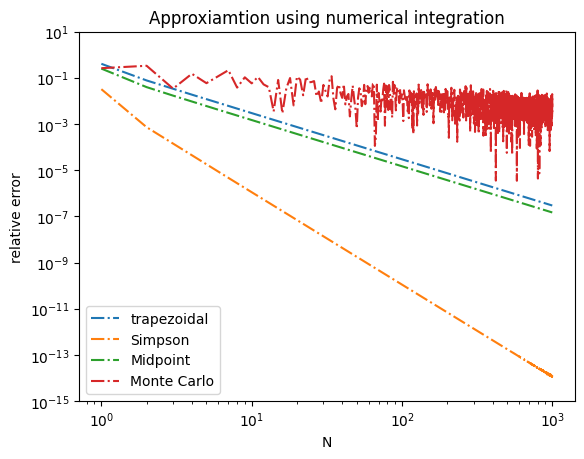

In [43]:
# Plot relative error as function of N
true = simpson_apr([0,5],100000)
plt.plot(range(1,max_N), [np.abs((x - true)/true) for x in data_trap], '-.', label='trapezoidal')
plt.plot(range(1,max_N), [np.abs((x - true)/true) for x in data_simps], '-.', label='Simpson')
plt.plot(range(1,max_N), [np.abs((x - true)/true) for x in data_midpoint], '-.', label='Midpoint')
plt.plot(range(1,max_N), [np.abs((x - true)/true) for x in data_monte], '-.', label='Monte Carlo')                                                                                                                                                                                                                                                                                                                                                                        
#plt.axhline(y = 0, color = "grey", alpha = 0.5, label = "GT")
plt.xscale('log')
plt.ylim((10e-16, 10))
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('relative error')
plt.title('Approxiamtion using numerical integration')
plt.legend()
plt.show()

In [24]:
data_simps

[0.4643604002312939,
 0.7155153461192085,
 0.7488599014306746,
 0.7602014807147994,
 0.7653939092708463,
 0.7681995733209784,
 0.7698862701105712,
 0.7709789867173679,
 0.7717272364659185,
 0.7722620004615054,
 0.7726574216781689,
 0.7729580333611102,
 0.7731918971637052,
 0.7733774094181619,
 0.7735270380378202,
 0.7736494760460026,
 0.7737509346337527,
 0.7738359474236578,
 0.7739078862706976,
 0.7739693010708609,
 0.7740221490106605,
 0.7740679525390645,
 0.7741079103106493,
 0.7741429764471234,
 0.7741739180511233,
 0.7742013575343212,
 0.7742258041754541,
 0.7742476779301557,
 0.7742673275929572,
 0.7742850447923102,
 0.7743010748765367,
 0.7743156254557838,
 0.7743288731595575,
 0.7743409690235072,
 0.7743520428142766,
 0.7743622065251117,
 0.7743715572190946,
 0.7743801793555245,
 0.7743881467041092,
 0.7743955239283642,
 0.7744023679019804,
 0.7744087288084098,
 0.7744146510635377,
 0.7744201740932308,
 0.7744253329912862,
 0.7744301590783413,
 0.7744346803784314,
 0.7744389220